In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

C:\Users\singhy\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\singhy\AppData\Local\Temp\ipykernel_12128\3635408121.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data/labor_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output/data"

In [3]:
data = pd.read_csv(f"{output_dir}/clean_stocks.csv")

In [4]:
data

,date,E,U,P,Z,P_12m_change,P_1m_change_annualize,P_4m_change_annualize,V,V_rate,tot_quits,vacancy_stock,tot_hires,tot_layoffs,U_rate,tightness
0,1948-01-01,44679,2034.0,23.680,23.106,10.242086,14.752832,15.542669,NaN,NaN,NaN,NaN,NaN,NaN,4.354248,NaN
1,1948-02-01,44533,2328.0,23.670,23.106,9.481961,-0.505581,13.944318,NaN,NaN,NaN,NaN,NaN,NaN,4.967884,NaN
2,1948-03-01,44683,2399.0,23.500,23.106,6.818182,-8.286081,7.853499,NaN,NaN,NaN,NaN,NaN,NaN,5.095366,NaN
3,1948-04-01,44379,2386.0,23.820,23.045,8.272727,17.621507,7.191753,NaN,NaN,NaN,NaN,NaN,NaN,5.102106,NaN
4,1948-05-01,44796,2118.0,24.010,23.045,9.384966,10.003077,5.691935,NaN,NaN,NaN,NaN,NaN,NaN,4.514644,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,2024-04-01,158214,6492.0,313.207,112.639,3.357731,3.820226,5.911468,7919.0,4.807961,3452.0,7919.0,5615.0,1542.0,3.941569,1.219809
916,2024-05-01,158430,6649.0,313.225,NaN,3.250210,0.068986,4.651387,8230.0,4.985492,3403.0,8230.0,5655.0,1678.0,4.027769,1.237780
917,2024-06-01,158548,6811.0,313.049,NaN,2.975629,-0.672196,2.590258,7910.0,4.783532,3214.0,7910.0,5248.0,1560.0,4.118917,1.161357
918,2024-07-01,158637,7163.0,313.534,NaN,2.923566,1.875058,1.681058,7673.0,4.627865,3277.0,7673.0,5521.0,1762.0,4.320265,1.071199


C:\Users\singhy\AppData\Local\Temp\ipykernel_12128\394958637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


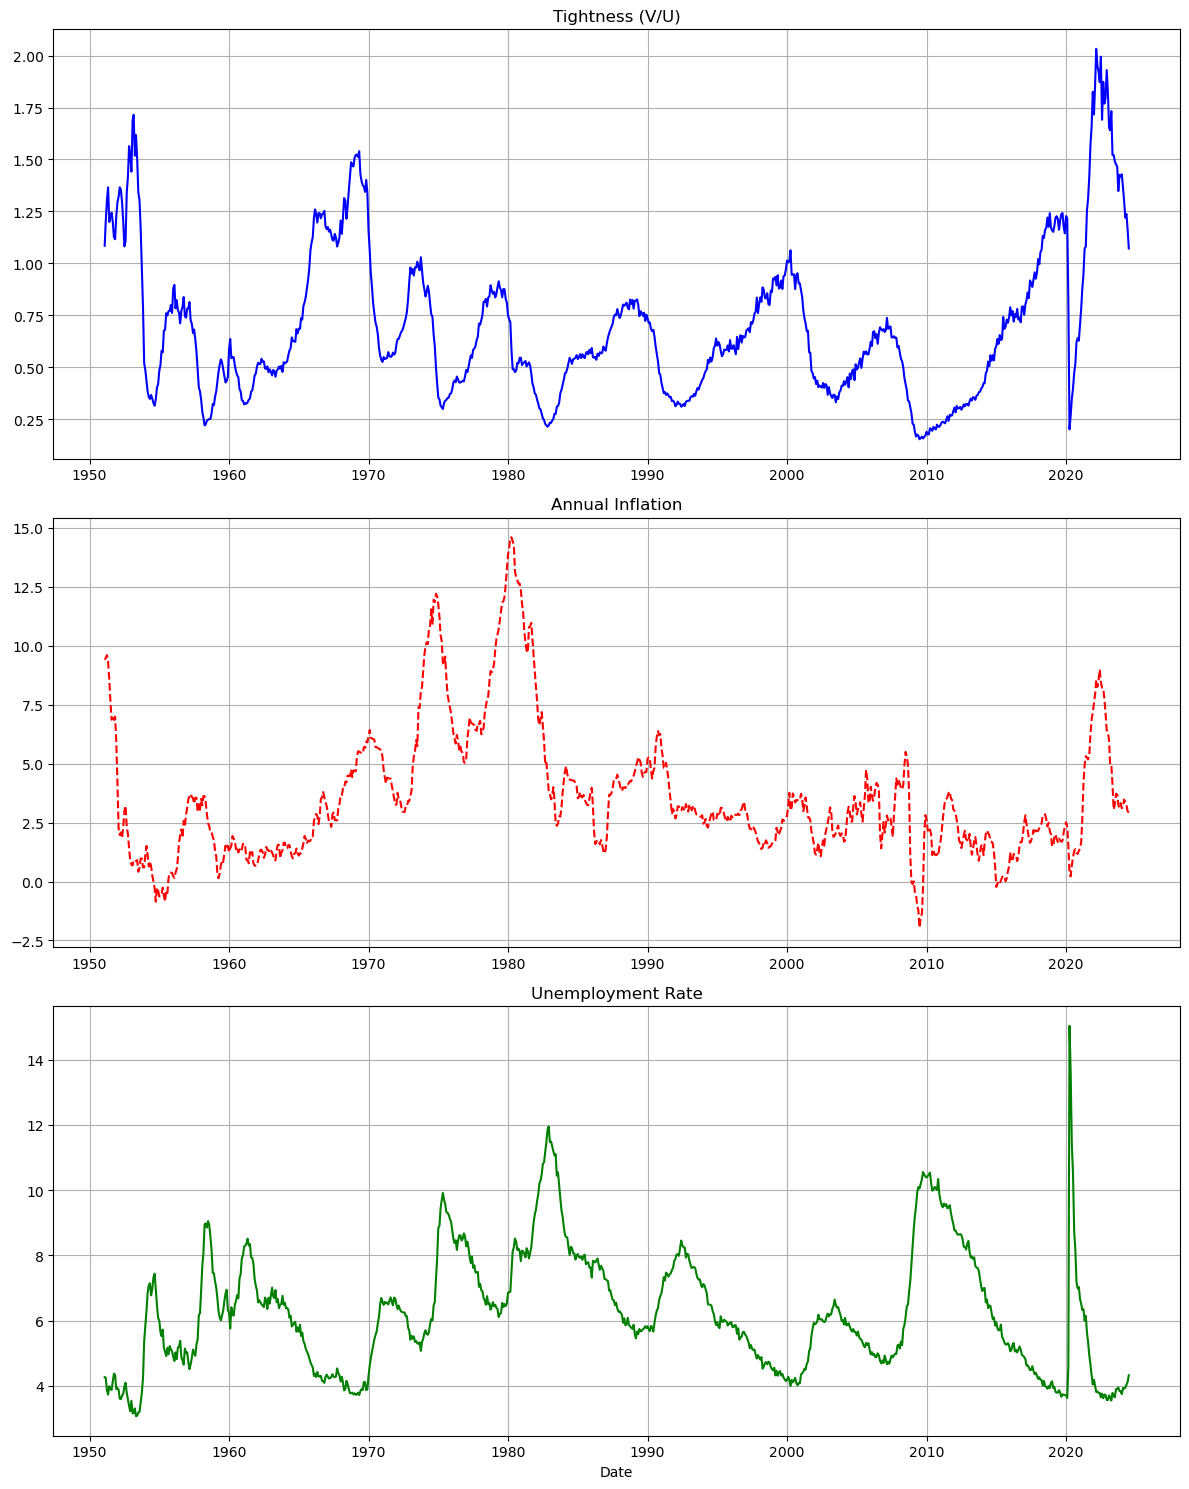

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime if not already done
data['date'] = pd.to_datetime(data['date'])

# Drop rows with missing values in 'tightness', 'P_12m_change', or 'U_rate'
data = data.dropna(subset=['tightness', 'P_12m_change', 'U_rate'])

# Create a new figure
plt.figure(figsize=(12, 15))

# Plot Tightness
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(data['date'], data['tightness'], linestyle='-', color='b')
plt.title('Tightness (V/U)')
plt.grid(True)

# Plot Inflation
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(data['date'], data['P_12m_change'], linestyle='--', color='r')
plt.title('Annual Inflation')
plt.grid(True)

# Plot Unemployment Rate
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(data['date'], data['U_rate'], linestyle='-', color='g')
plt.xlabel('Date')
plt.title('Unemployment Rate')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [7]:
import statsmodels.api as sm

# Assuming your data is in a DataFrame called 'data'
# Drop rows with missing values in the columns of interest
data_clean = data[['V_rate', 'U_rate', 'Z', 'P_12m_change']].dropna()

# Define the dependent and independent variables
X = data_clean[['U_rate','P_12m_change']]
y = data_clean['V_rate']

# Add a constant to the independent variables matrix (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 V_rate   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     448.6
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          7.34e-135
Time:                        15:39:59   Log-Likelihood:                -1002.7
No. Observations:                 879   AIC:                             2011.
Df Residuals:                     876   BIC:                             2026.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.3156      0.094     56.502   

In [21]:

# Drop rows with missing values in the columns of interest
data_clean = data[['V_rate', 'U_rate', 'Z', 'P_12m_change']].dropna()

# Apply natural logarithm to the variables
data_clean['log_V_rate'] = np.log(data_clean['V_rate'])
data_clean['log_U_rate'] = np.log(data_clean['U_rate'])
data_clean['log_P_12m_change'] = np.log(data_clean['P_12m_change'])

# Check for inf values and drop them
data_clean = data_clean.replace([np.inf, -np.inf], np.nan).dropna()

# Define the dependent and independent variables (now in log space)
X = data_clean[['log_U_rate', 'log_P_12m_change']]
y = data_clean['log_V_rate']

# Add a constant to the independent variables matrix (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_V_rate   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     339.8
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          3.85e-109
Time:                        16:09:20   Log-Likelihood:                 138.12
No. Observations:                 852   AIC:                            -270.2
Df Residuals:                     849   BIC:                            -256.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1913      0.045  

C:\Users\singhy\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\singhy\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
data_clean = data[['Z', 'tightness', 'P_12m_change']].dropna()

# Define the dependent and independent variables
X = data_clean[['Z', 'P_12m_change']]
y = data_clean['tightness']

# Add a constant to the independent variables matrix (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              tightness   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     16.66
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           7.90e-08
Time:                        16:10:31   Log-Likelihood:                -327.77
No. Observations:                 879   AIC:                             661.5
Df Residuals:                     876   BIC:                             675.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5368      0.037     14.637   

In [24]:
# Assuming your data is in a DataFrame called 'data'
# Drop rows with missing values in the columns of interest
data_clean = data[['Z', 'tightness', 'P_12m_change']].dropna()

# Apply natural logarithm to the variables
data_clean['log_tightness'] = np.log(data_clean['tightness'])
data_clean['log_P_12m_change'] = np.log(data_clean['P_12m_change'])

# Check for inf values and drop them
data_clean = data_clean.replace([np.inf, -np.inf], np.nan).dropna()

# Define the dependent and independent variables (now in log space)
X = data_clean[['log_P_12m_change']]
y = data_clean['log_tightness']

# Add a constant to the independent variables matrix (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          log_tightness   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     17.91
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           2.57e-05
Time:                        16:11:53   Log-Likelihood:                -609.98
No. Observations:                 852   AIC:                             1224.
Df Residuals:                     850   BIC:                             1233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5669      0.027  

C:\Users\singhy\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\singhy\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


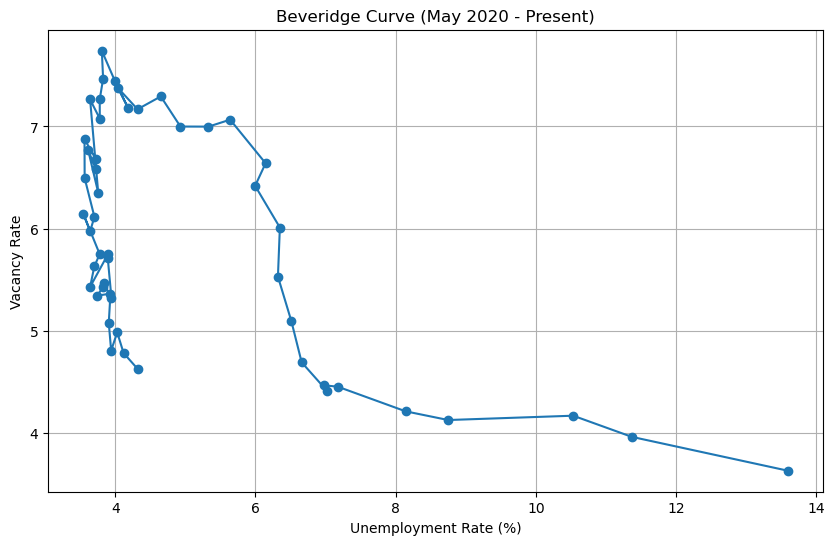

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format using .loc to avoid the SettingWithCopyWarning
data.loc[:, 'date'] = pd.to_datetime(data['date'])

# Filter the data for the period May 2020 - Present
filtered_data = data[data['date'] >= '2020-05-01']

# Plot the Beveridge curve: Unemployment Rate vs Vacancy Rate
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['U_rate'], filtered_data['V_rate'], marker='o', linestyle='-')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Vacancy Rate')
plt.title('Beveridge Curve (May 2020 - Present)')
plt.grid(True)
plt.show()


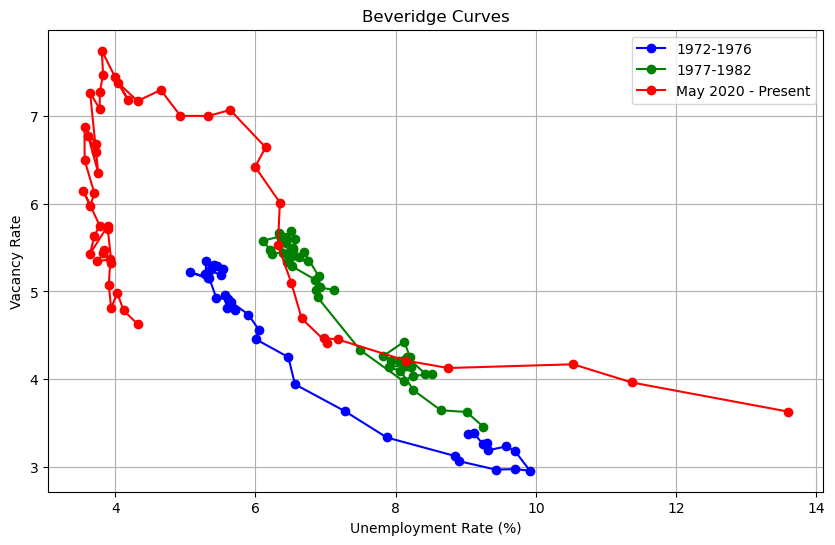

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Define the time periods
period1 = (data['date'] >= '1973-01-01') & (data['date'] <= '1975-12-31')
period2 = (data['date'] >= '1978-01-01') & (data['date'] <= '1981-12-31')
period3 = (data['date'] >= '2020-05-01')

# Filter data for each period
data_1972_1976 = data[period1]
data_1977_1982 = data[period2]
data_2020_present = data[period3]

# Plot the Beveridge curves for each period
plt.figure(figsize=(10, 6))

plt.plot(data_1972_1976['U_rate'], data_1972_1976['V_rate'], marker='o', linestyle='-', color='b', label='1972-1976')
plt.plot(data_1977_1982['U_rate'], data_1977_1982['V_rate'], marker='o', linestyle='-', color='g', label='1977-1982')
plt.plot(data_2020_present['U_rate'], data_2020_present['V_rate'], marker='o', linestyle='-', color='r', label='May 2020 - Present')

# Labeling
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Vacancy Rate')
plt.title('Beveridge Curves')
plt.grid(True)
plt.legend()
plt.show()


In [13]:
# Calculate the necessary variables
u = data['U_rate']
v = data['V_rate']
v_u = data['tightness'] 
z = data['Z']
pi = data['P_12m_change']


In [17]:
# Calculate Standard Deviation
std_dev = {
    'u': np.std(u),
    'v': np.std(v),
    'v/u': np.std(v_u),
    'pi': np.std(pi)
}

# Calculate Quarterly Autocorrelation
autocorr = {
    'u': u.autocorr(lag=3),  # Quarterly autocorrelation
    'v': v.autocorr(lag=3),
    'v/u': v_u.autocorr(lag=3),
    'pi': pi.autocorr(lag=3)
}

# Calculate Correlation Matrix
corr_matrix = pd.DataFrame({
    'u': u,
    'v': v,
    'v/u': v_u,
    'pi': pi
}).corr()

# Prepare the summary table
summary_table = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Quarterly Autocorrelation': autocorr
}).T

# Add the correlation matrix to the summary table using pd.concat
summary_table = pd.concat([summary_table, corr_matrix])

# Format the table to match the desired output
summary_table = summary_table.round(3)
print(summary_table)

                               u      v    v/u     pi
Standard Deviation         1.849  1.077  0.358  2.814
Quarterly Autocorrelation  0.914  0.965  0.955  0.953
u                          1.000 -0.546 -0.801  0.079
v                         -0.546  1.000  0.867  0.412
v/u                       -0.801  0.867  1.000  0.171
pi                         0.079  0.412  0.171  1.000
